# Homer Summary

Summarize Homer runs across peak sets in a bubble plot similar to Fig 2H in Knaupp et al 2017

<img src="./data/Knaupp_2017_fig2H.png" width="800">

In [301]:
library(ggplot2)
library(scales)

## Load TF List

Can come by running TF-MoDISco or similar on samples and matching motifs to closest known HOMER motif (using TomTom, say).

In [302]:
motif_list = read.table("tf_list.tsv")
rownames(motif_list) = motif_list$V1
colnames(motif_list) = c("motif", "freq")
head(motif_list, 2)
dim(motif_list)

,motif,freq
,<fct>,<int>
NFY(CCAAT)/Promoter/Homer,NFY(CCAAT)/Promoter/Homer,36
"OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer","OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4-ChIP-Seq(GSE11431)/Homer",28


[1] 93  2

In [390]:
motif_list = motif_list[motif_list$freq>1,]
dim(motif_list)
tail(motif_list)

[1] 62  2

,motif,freq
,<fct>,<int>
Elk1(ETS)/Hela-Elk1-ChIP-Seq(GSE31477)/Homer,Elk1(ETS)/Hela-Elk1-ChIP-Seq(GSE31477)/Homer,2
E-box(bHLH)/Promoter/Homer,E-box(bHLH)/Promoter/Homer,2
CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer,CEBP(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer,2
Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,Bach2(bZIP)/OCILy7-Bach2-ChIP-Seq(GSE44420)/Homer,2
Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer,2
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,2


## Load HOMER Data

In [651]:
BASE_PATH = "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/"

samples = list.files(BASE_PATH)
samples = samples[order(nchar(samples), samples)]
samples

[1] "idx1"  "idx2"  "idx3"  "idx4"  "idx5"  "idx6"  "idx7"  "idx8"  "idx9" 
[10] "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx16" "idx17" "idx18"
[19] "idx19" "idx20" "idx21" "idx22" "idx23" "idx24" "idx25" "idx26" "idx27"
[28] "idx28" "idx29" "idx30" "idx31" "idx32" "idx33" "idx34" "idx35" "idx36"
[37] "idx37" "idx38" "idx39" "idx40"

In [652]:
homer_outputs = paste(BASE_PATH, samples, "/knownResults.txt", sep='')
homer_outputs

[1] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx1/knownResults.txt" 
 [2] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx2/knownResults.txt" 
 [3] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx3/knownResults.txt" 
 [4] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx4/knownResults.txt" 
 [5] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx5/knownResults.txt" 
 [6] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx6/knownResults.txt" 
 [7] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx7/knownResults.txt" 
 [8] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx8/knownResults.txt" 
 [9] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx9/knownResults.txt" 
[10] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx10/knownResults.txt"
[11] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx11/knownResults.txt"
[12] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx12/knownResults.txt"
[13] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx13/knownResults.txt"
[14] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx14/knownResults.txt"
[15] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx15/knownResults.txt"
[16] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx16/knownResults.txt"
[17] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx17/knownResults.txt"
[18] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx18/knownResults.txt"
[19] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx19/knownResults.txt"
[20] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx20/knownResults.txt"
[21] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx21/knownResults.txt"
[22] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx22/knownResults.txt"
[23] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx23/knownResults.txt"
[24] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx24/knownResults.txt"
[25] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx25/knownResults.txt"
[26] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx26/knownResults.txt"
[27] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx27/knownResults.txt"
[28] "../20200307_fine_clustering/homer/20200705_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n40/width_200bp_nobg/idx28/knownResults.txt"
[29] "../20200307_fine_cl

In [665]:
# reads homer Motif.Names (first column) and breaks them into 
# TF name and family name (if available)
# if family name not available, uses name of TF itself
get_tf_fam <- function(homer_motif_names) {
    tfs = c()
    fams = c()
    for (x in as.character(homer_motif_names)) {
        tf_fam = strsplit(x, "/")[[1]][1]
        tf_fam = strsplit(tf_fam, "\\(")[[1]]

        if (length(tf_fam)==2) {
            tf = tf_fam[1]
            fam = sub(")", "", tf_fam[2])
        }

        else {
            tf = tf_fam[1]
            fam = tf
        }
        
        tfs = c(tfs, tf)
        fams = c(fams, fam)
    }
    
    list(tfs, fams)
}

In [666]:
homer_results = list()
for (i in seq(1,length(homer_outputs))) {
    homer_results[[i]] = read.table(homer_outputs[i], sep="\t",header=T, comment.char="")   
    tf_fam = get_tf_fam(homer_results[[i]][,1])
    homer_results[[i]]$TF = unlist(tf_fam[1])
    homer_results[[i]]$TF_family = unlist(tf_fam[2])
}

In [667]:
head(homer_results[[1]],2)

,Motif.Name,Consensus,P.value,Log.P.value,q.value..Benjamini.,X..of.Target.Sequences.with.Motif.of.16569.,X..of.Target.Sequences.with.Motif,X..of.Background.Sequences.with.Motif.of.32989.,X..of.Background.Sequences.with.Motif,TF,TF_family
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<chr>
1,Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,DATGASTCATHN,0,-3924,0,4742,28.62%,2098.1,6.36%,Atf3,bZIP
2,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,0,-3833,0,4350,26.25%,1784.1,5.41%,Fra1,bZIP


In [668]:
# create consolidated df
consolidated_df = homer_results[[1]][,c(4,7, 10, 11)]
consolidated_df$sample = samples[[1]]

for (i in seq(2, length(homer_results))) {
    cur_df = homer_results[[i]][,c(4,7, 10, 11)]
    cur_df$sample = samples[[i]]
    consolidated_df = rbind(consolidated_df, cur_df)
}

In [669]:
# separate KLF into its own family (current it's with ZF)
consolidated_df$TF_family[grep("KLF", consolidated_df$TF, ignore.case = T)] = "KLF"

In [670]:
# rename etc
consolidated_df$sample = factor(consolidated_df$sample, levels=samples)
colnames(consolidated_df) = c("Log.P.value", "perc.target.seqs.with.motif", "TF", "TF_family", "sample")
consolidated_df$perc.target.seqs.with.motif = as.numeric(sub("%", "", consolidated_df$perc.target.seqs.with.motif))
head(consolidated_df)
dim(consolidated_df)

,Log.P.value,perc.target.seqs.with.motif,TF,TF_family,sample
,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,-3924,28.62,Atf3,bZIP,idx1
2,-3833,26.25,Fra1,bZIP,idx1
3,-3634,27.63,BATF,bZIP,idx1
4,-3505,28.74,AP-1,bZIP,idx1
5,-3234,16.82,Fosl2,bZIP,idx1
6,-3009,13.52,Jun-AP1,bZIP,idx1


[1] 15480     5

In [671]:
length(unique(consolidated_df$TF))

[1] 362

In [672]:
# if motif_list available, filter
keep_TFs = lapply(strsplit(rownames(motif_list), "\\("), "[[", 1)

consolidated_df = consolidated_df[consolidated_df$TF %in% keep_TFs, ]
dim(consolidated_df)
length(unique(consolidated_df$TF))

[1] 2200    5

[1] 53

In [673]:
# remove highly correlated TFs per family
# https://stackoverflow.com/questions/18275639/remove-highly-correlated-variables

REMOVE_ABOVE = 0.95

keep_TFs = c()
for (x in unique(consolidated_df$TF_family)) {
    cur_tf_df = consolidated_df[consolidated_df$TF_family==x, c("Log.P.value", "TF", "sample")]
    if (length(unique(cur_tf_df$TF))==1) {
        keep_TFs = c(keep_TFs, unique(cur_tf_df$TF))
        next 
    }
    
    # make TF x sample matrix 
    tf_sample_matrix = matrix(0, nrow=length(unique(cur_tf_df$TF)), ncol=length(unique(cur_tf_df$sample)))
    rownames(tf_sample_matrix) = unique(cur_tf_df$TF)
    colnames(tf_sample_matrix) = unique(cur_tf_df$sample)
    
    for (i in seq(1, dim(cur_tf_df)[1])) {
        tf_sample_matrix[cur_tf_df[i, "TF"], cur_tf_df[i, "sample"]] = cur_tf_df[i, "Log.P.value"]
    }
    
    # reorder TFs to bring those with most log p-value sum
    tf_sample_matrix = tf_sample_matrix[order(rowSums(tf_sample_matrix)), ]
    
    # remove those with high correlation to another
    tf_cor = cor(t(tf_sample_matrix), method='spearman')
    tf_cor[upper.tri(tf_cor)] <- 0
    diag(tf_cor) <- 0
    keep_TFs = c(keep_TFs, 
                 rownames(tf_cor)[!apply(tf_cor,1,function(x) any(x > REMOVE_ABOVE))])

}

length(keep_TFs)

[1] 39

In [674]:
consolidated_df = consolidated_df[consolidated_df$TF %in% keep_TFs, ]
dim(consolidated_df)
length(unique(consolidated_df$TF))

[1] 1600    5

[1] 38

In [685]:
# filter
LOG_PVAL_CUTOFF = log(1e-10)
TARGET_CUTOFF = 5

consolidated_df = consolidated_df[consolidated_df$Log.P.value < LOG_PVAL_CUTOFF, ]
consolidated_df = consolidated_df[consolidated_df$perc.target.seqs.with.motif > TARGET_CUTOFF, ]
dim(consolidated_df)

[1] 480   6

In [686]:
# remove SeqBias and Unknown and GFY/GFX
consolidated_df = consolidated_df[!grepl("(SeqBias|Unknown|GFY|GFX)", consolidated_df$TF) ,]

In [687]:
length(unique(consolidated_df$TF))

[1] 30

In [688]:
quantile(consolidated_df$Log.P.value, c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

0%        10%        25%        50%        75%        90%       100% 
-15560.000  -1417.000   -533.450   -173.550    -70.265    -37.577    -23.040

In [689]:
# determine order of peak sets
peak_set_idxs = lapply(strsplit(as.character(consolidated_df$sample), "idx"), "[[", 2)

max_peak_set = max(as.numeric(peak_set_idxs))

# ensure they are numbers (won't work if some clusters don't have any entry in consolidated_df)
# stopifnot(seq(1,length(unique(peak_set_idxs)))==as.numeric(unique(peak_set_idxs)))

consolidated_df$peak_set_idx = factor(peak_set_idxs,
                               levels=rev(as.character(seq(1,max_peak_set))))

In [690]:
TF_family_order = c('POU,Homeobox', 
                    'POU,Homeobox,HMG', 
                    'HMG', 
                    'KLF', 
                    'bZIP', 
                    'Zf', 
                    'AP2', 
                    'TEA',
                    'Runt',
                    'ETS',
                    'CCAAT')
TF_family_order = c(TF_family_order, as.character(unique(consolidated_df$TF_family))[!as.character(unique(consolidated_df$TF_family)) %in% TF_family_order])

consolidated_df$TF_family = factor(consolidated_df$TF_family,
                                  level=TF_family_order)

In [691]:
# use sample order to facet
# sample_order = c("idx3", "idx4", "idx8", "idx20", # constant
#                  "idx10", "idx13", "idx14", "idx17", "idx16", # close
#                  "idx2", "idx5", "idx18", "idx11", "idx19", # early open
#                 "idx1", "idx9", "idx12", "idx15", "idx7", "idx6") # late open

In [692]:
# https://dmitrijskass.netlify.app/2019/06/30/multi-level-labels-with-ggplot2/
# https://www.r-graph-gallery.com/320-the-basis-of-bubble-plot.html
p <- ggplot(consolidated_df, aes(x = TF, 
                            y = peak_set_idx, 
                            size=perc.target.seqs.with.motif,
                            fill=-Log.P.value)) +
geom_point(shape = 21) +
facet_grid(~factor(TF_family), #, levels=sample(unique(consolidated_df$TF_family))),
           scales = "free_x",
          space = "free_x") +
#           switch = "x") +
scale_fill_gradient(low="gray",
                      high="red",
                      limits=c(10, 200),
                      oob=squish,
                      name="- Log P-value") +
scale_size(range = c(.5, 9), 
           name="% Target Sequences\nwith Motif") +
ylab("") +
theme_minimal() +
theme(axis.text.x = element_text(angle = 90, hjust=0.95), # rotate TF text
     strip.text.x.top = element_text(angle = 90, hjust=0, vjust=0.5), # rotate TF family text
     panel.spacing = unit(0.05, "lines"), # space between TF families
     text = element_text(size=15), 
     panel.background = element_rect(fill = NA, color = "black", size=1)) # box around TF families

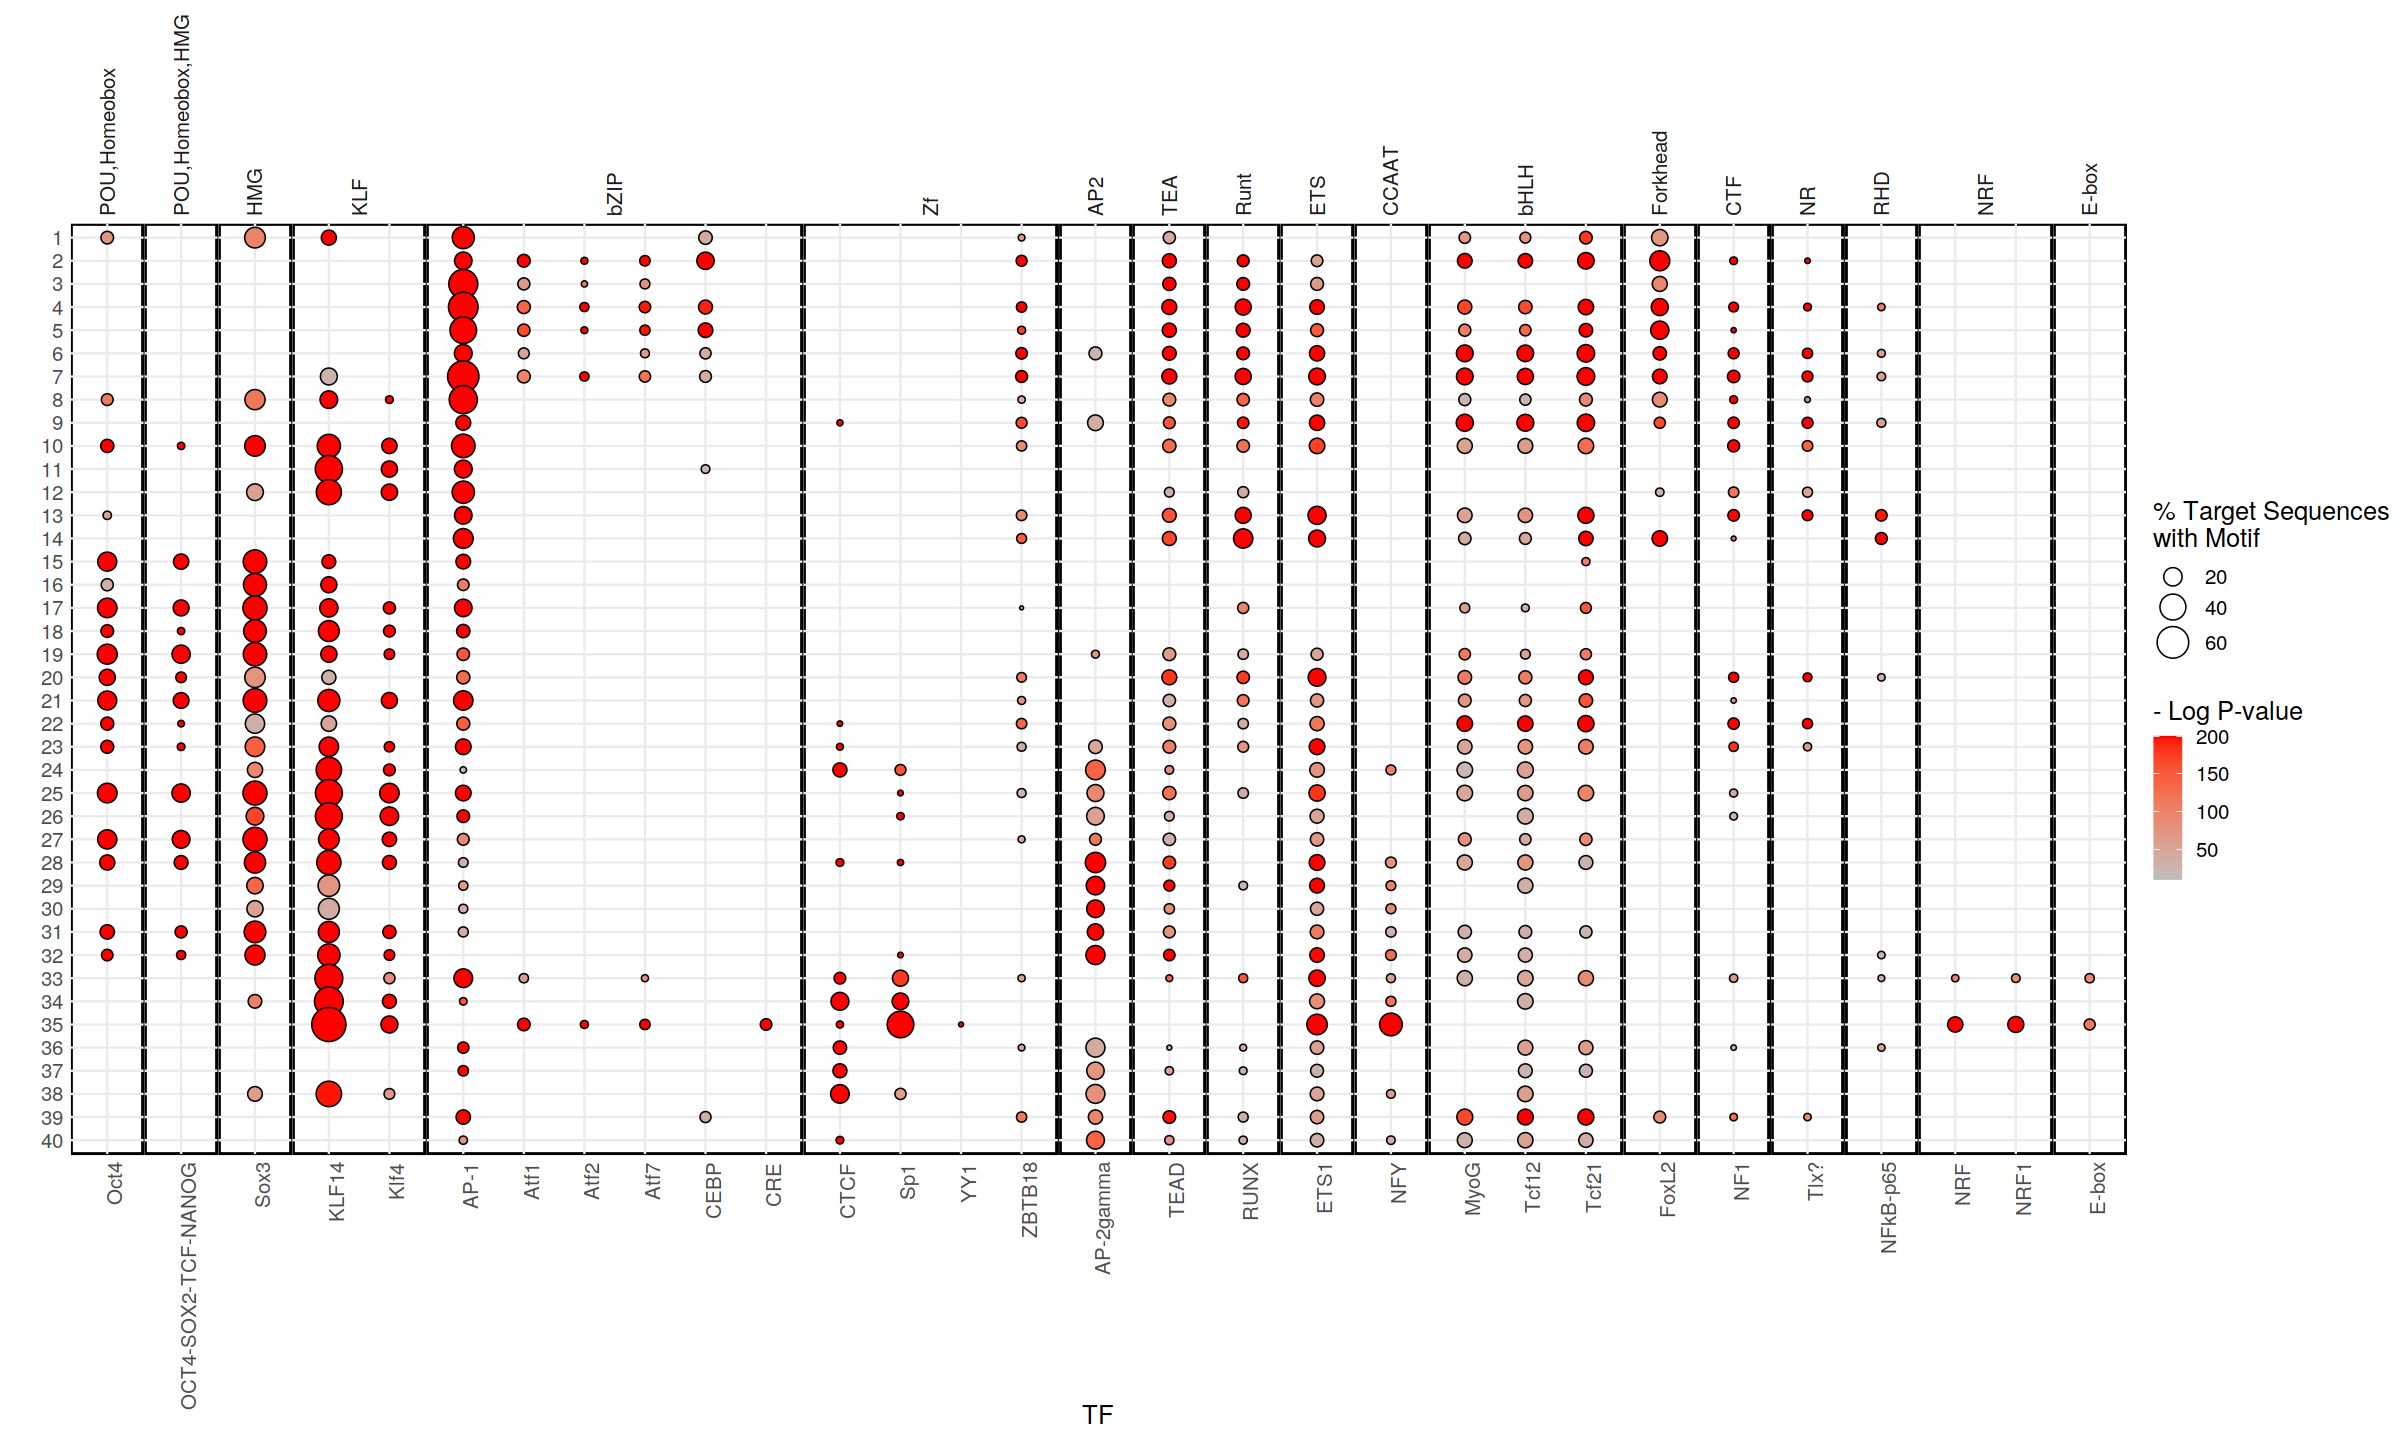

In [693]:
options(repr.plot.width = 20, repr.plot.height = 12)


pg <- ggplotGrob(p)

# avoid stripping of facet label
# https://stackoverflow.com/questions/49740215/ggplot-facet-grid-label-cut-off
for(i in which(grepl("strip-t", pg$layout$name))){
  pg$grobs[[i]]$layout$clip <- "off"
}

grid::grid.draw(pg)